# Resampling Datetime Data (Core)


*Christina Brockway*

Use weather data from London from Kaggle:  https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data

A modified version for this project:  https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing


## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as msno

import seaborn as sns
import numpy as np

import datetime as dt



In [2]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

## Load Data

In [3]:

df=pd.read_csv('data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.head()
df.tail()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN
15340,20201231,7.0,1.3,34.0,1.5,-0.8,-3.1,0.0,100500.0,NaN


## Convert to datetime dtype

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date'] = pd.to_datetime(df['date'].dt.strftime('%B %Y'))

### Set date column as index

In [5]:
df= df.set_index('date')
df.head(1)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0


### Filter out dates from 2000 on and keep only:
-  precipitation
-  mean temp
-  max temp
-  min temp
-  snow depth

In [6]:
df.sort_index()
#Slide dates
From = "20000101"
To = "20201231"
dff= df.copy()
dff=dff.loc[:,['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]

### Impute missing values

In [7]:
dff.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [8]:
#interpolate temperature measures
dff['mean_temp'] = dff['mean_temp'].interpolate()
dff['max_temp'] = dff['max_temp'].interpolate()
dff['min_temp'] = dff['min_temp'].interpolate()

In [9]:
#Fill precipitation values with 0
dff['precipitation']= dff['precipitation'].fillna(0)
dff['snow_depth'] = dff['snow_depth'].fillna(0)

In [10]:
dff.isna().sum()


precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [11]:
temp=dff.loc['20000101':"20101231"]
temp.tail()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2010-12-01,5.0,0.2,-4.6,8.0,1.0
2010-12-01,0.4,5.3,2.5,9.5,0.0
2010-12-01,1.4,6.8,4.1,7.7,0.0
2010-12-01,0.0,6.9,6.1,6.8,0.0
2010-12-01,0.0,5.9,5.0,7.2,0.0


# Q1 What month had the most precipitation between 2000 through 2010?

In [12]:
## Resample using .sum()
temp1=temp.resample("MS").sum()
temp1.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,14.3,174.05,82.10,262.95,0.0
2000-02-01,62.2,208.25,113.20,298.50,0.0
2000-03-01,13.4,263.25,151.65,377.45,0.0
2000-04-01,71.8,269.90,158.25,394.85,0.0
2000-05-01,68.4,427.75,295.40,556.30,0.0


In [13]:
max_prep = temp1['precipitation'].idxmax()
locmonths = mdates.MonthLocator(interval=3)
locyear = mdates.YearLocator(1)
fmtyear = mdates.DateFormatter("%Y")
titlep=  'Precipitation for 2000-2010'
ylabel = 'Inches'

In [14]:
max_prep = temp1['precipitation'].idxmax(axis=0).strftime('%B %Y')
max_prep

#adapted from: askpython.com/python/examples/obtain-current-year-and-month

'November 2009'

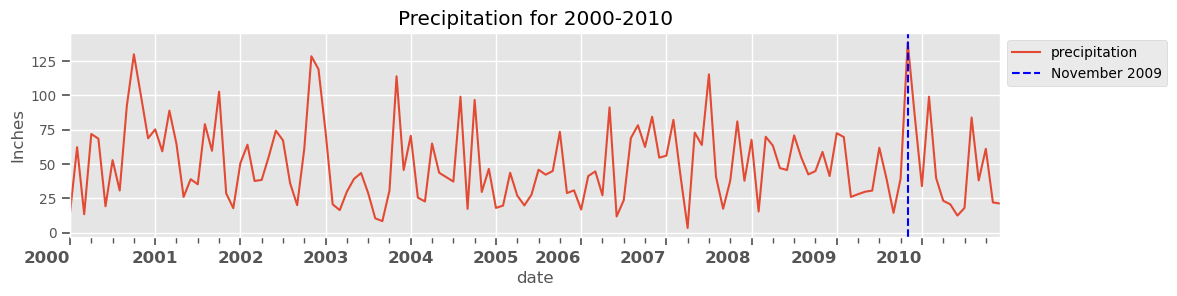

In [15]:
fig, ax = plt.subplots(figsize=(12,3))

#Set ticklabel format
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 'large', fontweight= 'bold')

#Set major ticks
ax.xaxis.set_major_locator(locyear)
ax.xaxis.set_major_formatter(fmtyear)

#Set minor ticks
ax.xaxis.set_minor_locator(locmonths)

fig.autofmt_xdate(which='major', rotation=90)
temp1['precipitation'].plot(ax=ax, title=titlep)
ax.axvline(max_prep, color='blue', linestyle= "--", label=f'{max_prep}')
ax.legend(bbox_to_anchor=[1,1]);ax.legend(bbox_to_anchor=[1,1])
ax.set_ylabel(ylabel)
plt.show();



# Q2 Which year between 2000-2020 had the coolest average temperature?

In [16]:
dff2=df.loc['20000101':"20201231"]
dff2.tail()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2020-12-01,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-01,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-01,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
2020-12-01,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN
2020-12-01,7.0,1.3,34.0,1.5,-0.8,-3.1,0.0,100500.0,NaN


In [17]:
## Resample using .sum()
temp2=dff2.resample("Y").mean()
temp2.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-12-31,5.763848,4.190087,114.883382,15.108746,11.532070,7.973469,2.107289,101337.405248,0.008746
2001-12-31,5.621387,4.714162,122.919075,14.965029,11.313006,7.641618,1.952023,101501.618497,0.000000
2002-12-31,5.757143,4.452857,120.857143,15.732000,12.006286,8.353143,2.148286,101383.600000,0.000000
2003-12-31,5.125356,5.505413,133.202279,16.494302,12.232764,7.986040,1.311396,101686.096866,0.025641
2004-12-31,5.636888,4.447550,121.383285,15.514409,11.872046,8.212392,1.710951,101563.717579,0.005764


In [18]:
low_temp= temp2['mean_temp'].idxmax().strftime('%Y')
locminor = mdates.YearLocator(1)
locmajor = mdates.YearLocator(5)
fmtyear = mdates.DateFormatter("%Y")
titlet=  'Average Temperature'
ylabel='Degrees'

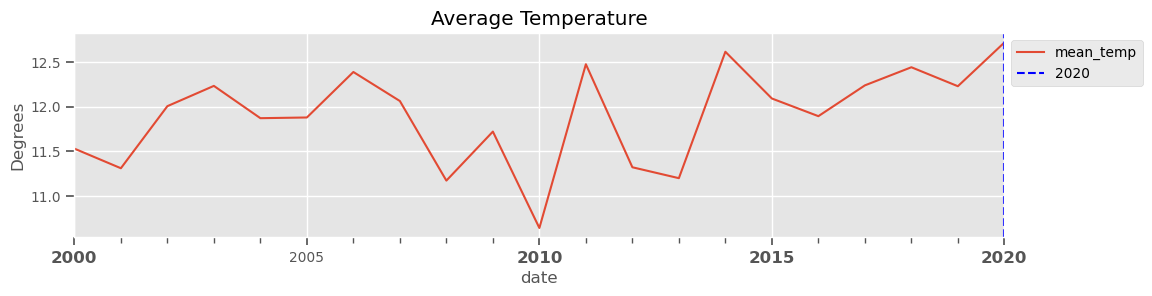

In [19]:
fig, ax = plt.subplots(figsize = (12,3))

ax.set()

#Set major ticks
ax.xaxis.set_major_locator(locmajor)
ax.xaxis.set_major_formatter(fmtyear)

#Set minor ticks
ax.xaxis.set_minor_locator(locminor)

#Set ticklabel format
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 'large', fontweight= 'bold')


fig = ax.get_figure()
fig.autofmt_xdate(rotation=90, ha= 'center')

temp2['mean_temp'].plot(ax=ax, title=titlet)
ax.axvline(low_temp, color='blue', linestyle= "--", label=f'{low_temp}')
ax.set_ylabel(ylabel)
ax.legend(bbox_to_anchor=[1,1]);ax.legend(bbox_to_anchor=[1,1])
plt.show();